<a href="https://colab.research.google.com/github/cluePrints/fastai-v3-notes/blob/master/fastai3_lesson6_rossman_(broken).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2

In [0]:
!pip install tsfresh -q

In [0]:
!pip freeze | grep scipy

scipy==1.1.0


In [0]:
from fastai.basics import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load

In [0]:
!ls rossmann.tgz > /dev/null || wget http://files.fast.ai/part2/lesson14/rossmann.tgz -q

ls: cannot access 'rossmann.tgz': No such file or directory


In [0]:
!ls weather.csv > /dev/null || tar zxvf rossmann.tgz

ls: cannot access 'weather.csv': No such file or directory
googletrend.csv
sample_submission.csv
state_names.csv
store.csv
store_states.csv
test.csv
train.csv
weather.csv


In [0]:
!ls

googletrend.csv  sample_submission.csv	store_states.csv  weather.csv
rossmann.tgz	 state_names.csv	test.csv
sample_data	 store.csv		train.csv


In [0]:
!for file in $(ls *.csv); do printf "\n# ${file}\n"; head -n2 "${file}"; done


# googletrend.csv
file,week,trend
Rossmann_DE_SN,2012-12-02 - 2012-12-08,96

# sample_submission.csv
"Id","Sales"
1,0

# state_names.csv
StateName,State
BadenWuerttemberg,BW

# store.csv
"Store","StoreType","Assortment","CompetitionDistance","CompetitionOpenSinceMonth","CompetitionOpenSinceYear","Promo2","Promo2SinceWeek","Promo2SinceYear","PromoInterval"
1,"c","a",1270,9,2008,0,,,""

# store_states.csv
Store,State
1,HE

# test.csv
"Id","Store","DayOfWeek","Date","Open","Promo","StateHoliday","SchoolHoliday"
1,1,4,2015-09-17,1,1,"0","0"

# train.csv
"Store","DayOfWeek","Date","Sales","Customers","Open","Promo","StateHoliday","SchoolHoliday"
1,5,2015-07-31,5263,555,1,1,"0","1"

# weather.csv
file,"Date","Max_TemperatureC","Mean_TemperatureC","Min_TemperatureC","Dew_PointC","MeanDew_PointC","Min_DewpointC","Max_Humidity","Mean_Humidity","Min_Humidity","Max_Sea_Level_PressurehPa","Mean_Sea_Level_PressurehPa","Min_Sea_Level_PressurehPa","Max_VisibilityKm","Mean_VisibilityKm","Min_Visibili

In [0]:
df_trends_file = pd.read_csv('googletrend.csv')
df_trends_file.head(1)

,file,week,trend
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96


In [0]:
df_trends_file.describe()

,trend
count,2072.000000
mean,63.814189
std,12.650246
min,0.000000
25%,55.000000
50%,64.000000
75%,72.000000
max,100.000000


In [0]:
df_state_names = pd.read_csv('state_names.csv')
df_state_names.head(1)

,StateName,State
0,BadenWuerttemberg,BW


In [0]:
df_state_names.describe()

,StateName,State
count,16,16
unique,16,16
top,Saarland,HH
freq,1,1


In [0]:
df_store = pd.read_csv('store.csv')
df_store.head(1)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [0]:
df_store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [0]:
df_store_states = pd.read_csv('store_states.csv')
df_store_states.head(1)

,Store,State
0,1,HE


In [0]:
df_store_states.groupby('State').count()

,Store
State,
BE,92
BW,73
BY,180
"HB,NI",22
HE,112
HH,28
NW,286
RP,40
SH,115


In [0]:
df_train = pd.read_csv('train.csv')
df_train.head(1)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1


In [0]:
df_weather = pd.read_csv('weather.csv')
df_weather.columns

Index(['file', 'Date', 'Max_TemperatureC', 'Mean_TemperatureC',
       'Min_TemperatureC', 'Dew_PointC', 'MeanDew_PointC', 'Min_DewpointC',
       'Max_Humidity', 'Mean_Humidity', 'Min_Humidity',
       'Max_Sea_Level_PressurehPa', 'Mean_Sea_Level_PressurehPa',
       'Min_Sea_Level_PressurehPa', 'Max_VisibilityKm', 'Mean_VisibilityKm',
       'Min_VisibilitykM', 'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h',
       'Max_Gust_SpeedKm_h', 'Precipitationmm', 'CloudCover', 'Events',
       'WindDirDegrees'],
      dtype='object')

In [0]:
df_weather[df_weather['Date']=='2013-01-01'][['file', 'Date', 'Events']].head(3)

,file,Date,Events
0,NordrheinWestfalen,2013-01-01,Rain
990,Niedersachsen,2013-01-01,Rain
1980,Bayern,2013-01-01,Fog-Rain


In [0]:
df_weather.describe()

,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressurehPa,...,Min_Sea_Level_PressurehPa,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,WindDirDegrees
count,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,...,15840.000000,15459.000000,15459.000000,15459.000000,15840.000000,15840.000000,3604.000000,15840.000000,14667.000000,15840.000000
mean,14.644129,10.388952,6.198990,8.587816,6.205808,3.626136,93.659596,74.282891,50.158586,1018.532197,...,1012.307955,24.057572,12.239796,7.025163,22.766604,11.972222,48.864317,0.831718,5.551306,175.896717
std,8.646012,7.379260,6.526391,6.244780,6.086768,6.128390,7.678530,13.486552,19.960216,7.788720,...,8.600585,8.976799,5.067944,4.980602,8.988618,5.872844,13.026954,2.513506,1.687710,101.588872
min,-11.000000,-13.000000,-15.000000,-14.000000,-15.000000,-73.000000,44.000000,30.000000,4.000000,976.000000,...,970.000000,0.000000,0.000000,0.000000,3.000000,2.000000,21.000000,0.000000,0.000000,-1.000000
25%,8.000000,4.000000,1.000000,4.000000,2.000000,-1.000000,90.750000,65.000000,34.000000,1014.000000,...,1007.000000,14.000000,10.000000,3.000000,16.000000,8.000000,39.000000,0.000000,5.000000,80.000000
50%,15.000000,11.000000,7.000000,9.000000,7.000000,4.000000,94.000000,76.000000,49.000000,1019.000000,...,1013.000000,31.000000,11.000000,7.000000,21.000000,11.000000,48.000000,0.000000,6.000000,202.000000
75%,21.000000,16.000000,11.000000,13.000000,11.000000,8.000000,100.000000,85.000000,66.000000,1024.000000,...,1018.000000,31.000000,14.000000,10.000000,27.000000,14.000000,55.000000,0.250000,7.000000,256.000000
max,39.000000,31.000000,24.000000,25.000000,20.000000,19.000000,100.000000,100.000000,100.000000,1043.000000,...,1038.000000,31.000000,31.000000,31.000000,101.000000,53.000000,111.000000,58.930000,8.000000,360.000000


In [0]:
df_weather['Date'].max()

'2015-09-17'

In [0]:
df_test = pd.read_csv('test.csv')
df_test.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [0]:
df_test['Date'].describe(), df_test['Date'].min(), df_test['Date'].max()

(count          41088
 unique            48
 top       2015-09-16
 freq             856
 Name: Date, dtype: object, '2015-08-01', '2015-09-17')

In [0]:
df_train['Date'].describe(), df_train['Date'].min(), df_train['Date'].max()

(count        1017209
 unique           942
 top       2014-03-22
 freq            1115
 Name: Date, dtype: object, '2013-01-01', '2015-07-31')

# 2. Clean

## 2.1. Weather

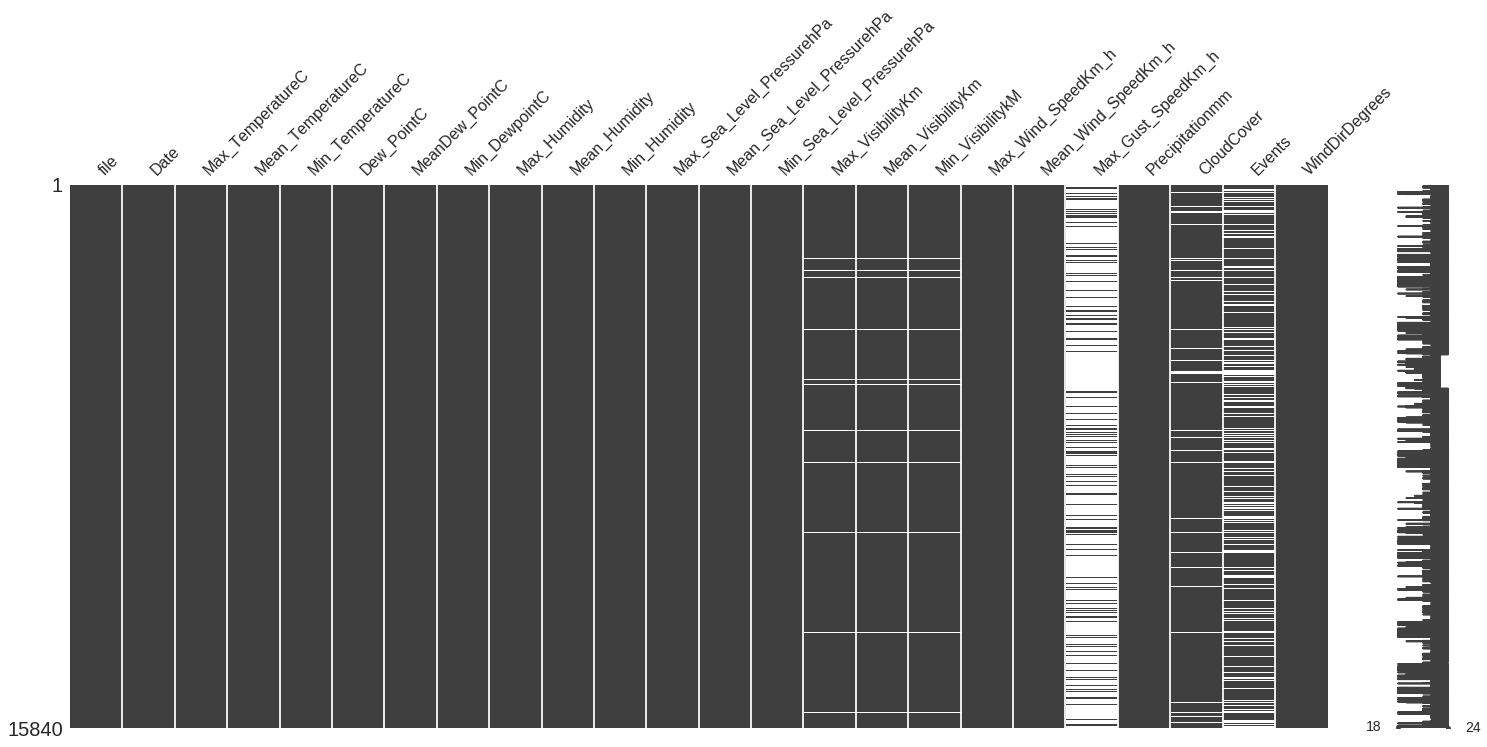

In [0]:
# Note to self: seaborn crashes here
#import seaborn as sns
#sns.heatmap(df_weather.isnull(), cbar=False)
import missingno as msno
msno.matrix(df_weather)

In [0]:
df_weather.isnull().sum()

file                              0
Date                              0
Max_TemperatureC                  0
Mean_TemperatureC                 0
Min_TemperatureC                  0
Dew_PointC                        0
MeanDew_PointC                    0
Min_DewpointC                     0
Max_Humidity                      0
Mean_Humidity                     0
Min_Humidity                      0
Max_Sea_Level_PressurehPa         0
Mean_Sea_Level_PressurehPa        0
Min_Sea_Level_PressurehPa         0
Max_VisibilityKm                381
Mean_VisibilityKm               381
Min_VisibilitykM                381
Max_Wind_SpeedKm_h                0
Mean_Wind_SpeedKm_h               0
Max_Gust_SpeedKm_h            12236
Precipitationmm                   0
CloudCover                     1173
Events                         3951
WindDirDegrees                    0
dtype: int64

In [0]:
if not 'State' in df_weather.columns:
  merged = df_weather.merge(df_state_names, left_on='file', right_on='StateName', how='left')
  merged = merged.drop('StateName', axis=1)
  assert 0 == sum(merged['State'].isnull())
  merged = merged.drop('file', axis=1)
  df_weather = merged

In [0]:
df_weather['Date'] = pd.to_datetime(df_weather['Date'])

In [0]:
df_weather.columns

Index(['Date', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
       'Dew_PointC', 'MeanDew_PointC', 'Min_DewpointC', 'Max_Humidity',
       'Mean_Humidity', 'Min_Humidity', 'Max_Sea_Level_PressurehPa',
       'Mean_Sea_Level_PressurehPa', 'Min_Sea_Level_PressurehPa',
       'Max_VisibilityKm', 'Mean_VisibilityKm', 'Min_VisibilitykM',
       'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h', 'Max_Gust_SpeedKm_h',
       'Precipitationmm', 'CloudCover', 'Events', 'WindDirDegrees', 'State'],
      dtype='object')

In [0]:
df_weather[['State', 'Date']].groupby('State', as_index=False).count()

,State,Date
0,BB,990
1,BE,990
2,BW,990
3,BY,990
4,HB,990
5,"HB,NI",990
6,HE,990
7,HH,990
8,MV,990
9,NW,990


## 2.2. Google trends

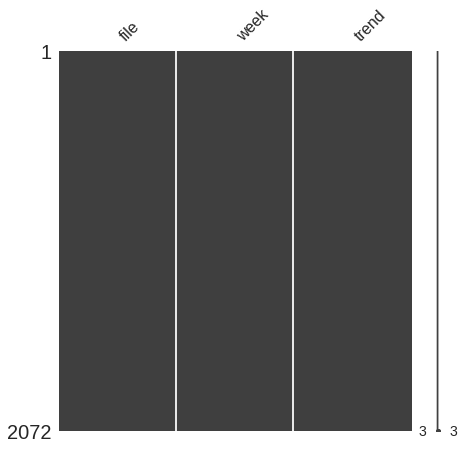

In [0]:
msno.matrix(df_trends_file, figsize=(7,7))

In [0]:
# Note to self: series.str.split(..., expand=True) is fun
week_start = df_trends_file['week'].str.split(' ', expand=True)[0]
week_start = pd.to_datetime(week_start)
df_trends_file['week_start_date'] = week_start
df_trends_file.head()

,file,week,trend,week_start_date
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96,2012-12-02
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95,2012-12-09
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91,2012-12-16
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48,2012-12-23
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67,2012-12-30


In [0]:
trends_states = df_trends_file['file'].apply(lambda s: s.split('_')[2] if s.count('_') == 2 else None)
# Note to self: df.groupby(..., as_index=False) is fun
df_trends_file[trends_states.isna()].groupby('file', as_index=False).count()

,file,week,trend,week_start_date
0,Rossmann_DE,148,148,148


In [0]:
df_trends_country = df_trends_file[df_trends_file['file'] == 'Rossmann_DE']
df_trends_country['country_trend'] = df_trends_country['trend']
df_trends_country = df_trends_country.drop(['file', 'week', 'trend'], axis=1)
df_trends_country.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,week_start_date,country_trend
148,2012-12-02,77
149,2012-12-09,76
150,2012-12-16,85
151,2012-12-23,59
152,2012-12-30,61


In [0]:
df_trends_country.head()

,week_start_date,country_trend
148,2012-12-02,77
149,2012-12-09,76
150,2012-12-16,85
151,2012-12-23,59
152,2012-12-30,61


In [0]:
df_trends_file['State'] = trends_states
# Note to self: df[~series]
df_trends = df_trends_file.loc[~df_trends_file['State'].isna()]
df_trends['state_trend'] = df_trends['trend']
df_trends = df_trends.drop(['file', 'week', 'trend'], axis=1)
df_trends.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,week_start_date,State,state_trend
0,2012-12-02,SN,96
1,2012-12-09,SN,95
2,2012-12-16,SN,91
3,2012-12-23,SN,48
4,2012-12-30,SN,67


In [0]:
trends_states = set(df_trends['State'].unique())
states = set(df_state_names['State'].unique())
trends_states - states, states - trends_states

({'NI'}, {'BB', 'HB', 'HB,NI', 'MV'})

In [0]:
# NI is 'HB,NI' everywhere else in the data
df_trends.loc[df_trends['State'] == 'NI','State'] = 'HB,NI'

## 2.3. Stores

In [0]:
if not 'State' in df_store.columns:
  merged = df_store.merge(df_store_states, on='Store', how='left')
  assert 0 == sum(merged['State'].isnull())
  df_store = merged

In [0]:
df_store[['State', 'Store']].groupby('State', as_index=False).count()

,State,Store
0,BE,92
1,BW,73
2,BY,180
3,"HB,NI",22
4,HE,112
5,HH,28
6,NW,286
7,RP,40
8,SH,115
9,SN,75


# 3. Generate date features: TODO

In [0]:
def add_date_parts(df, column_name, prefix=None):
  df[column_name] = pd.to_datetime(df[column_name], unit='D')
  if prefix == None:
    prefix = column_name + '__';

  date_attributes = [ 'year', 'month', 'day', 'quarter',
       'weekofyear',
       'dayofyear',
       'dayofweek',              
       'is_leap_year',
       'is_month_end',
       'is_month_start',
       'is_quarter_end',
       'is_quarter_start',
       'is_year_end',
       'is_year_start']

  for attribute in date_attributes:
    df[prefix + attribute] = getattr(df[column_name].dt, attribute)

  return df

sample = df_trends[:5].copy()
add_date_parts(sample, 'week_start_date')

,week_start_date,State,state_trend,week_start_date__year,week_start_date__month,week_start_date__day,week_start_date__quarter,week_start_date__weekofyear,week_start_date__dayofyear,week_start_date__dayofweek,week_start_date__is_leap_year,week_start_date__is_month_end,week_start_date__is_month_start,week_start_date__is_quarter_end,week_start_date__is_quarter_start,week_start_date__is_year_end,week_start_date__is_year_start
0,2012-12-02,SN,96,2012,12,2,4,48,337,6,True,False,False,False,False,False,False
1,2012-12-09,SN,95,2012,12,9,4,49,344,6,True,False,False,False,False,False,False
2,2012-12-16,SN,91,2012,12,16,4,50,351,6,True,False,False,False,False,False,False
3,2012-12-23,SN,48,2012,12,23,4,51,358,6,True,False,False,False,False,False,False
4,2012-12-30,SN,67,2012,12,30,4,52,365,6,True,False,False,False,False,False,False


/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


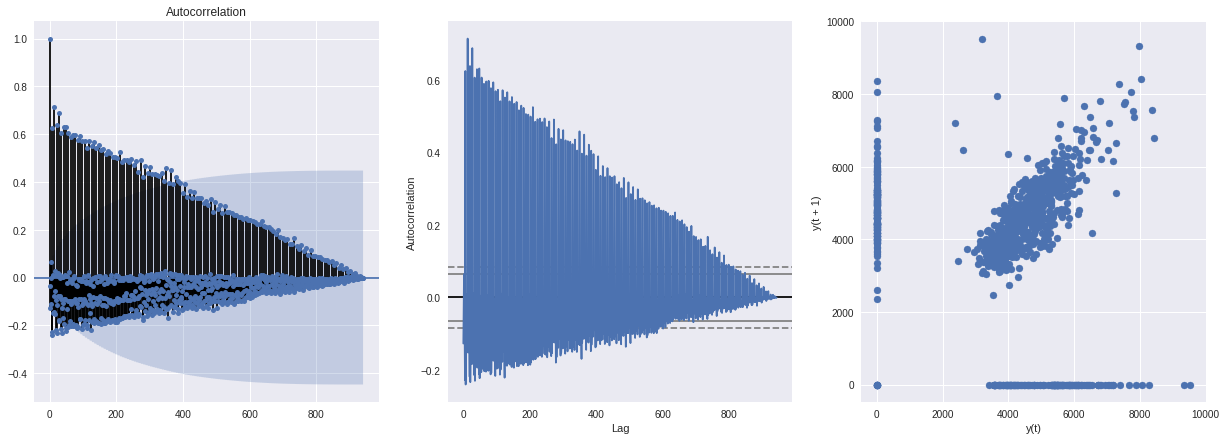

In [0]:
store_1_sales = df_train[df_train['Store'] == 1]['Sales']
from pandas.plotting import autocorrelation_plot, lag_plot
from statsmodels.graphics.tsaplots import plot_acf
from scipy import integrate
fig, axes = plt.subplots(ncols=3, figsize=(21, 7))

for func, ax in zip([plot_acf, autocorrelation_plot, lag_plot], axes):
  func(store_1_sales, ax=ax)

In [0]:
"""
Daylight savings or not."""
# TODO: expanding / rolling pandas for the following stuff
# days since / to holiday 
# days since open
# PromoInterval, other Promo* stuff
# lags
# https://stackoverflow.com/questions/45022226/find-days-since-last-event-pandas-dataframe


'\nDaylight savings or not.'

# 4. Denormalize

In [0]:
df_store.head(1)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,State
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,HE


In [0]:
df_weather.head(1)

,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,...,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees,State
0,2013-01-01,8,4,2,7,5,1,94,87,65,...,12.0,4.0,39,26,58.0,5.08,6.0,Rain,215,NW


In [0]:
df_weather.head()

,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,...,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees,State
0,2013-01-01,8,4,2,7,5,1,94,87,65,...,12.0,4.0,39,26,58.0,5.08,6.0,Rain,215,NW
1,2013-01-02,7,4,1,5,3,2,93,85,78,...,14.0,10.0,24,16,NaN,0.00,6.0,Rain,225,NW
2,2013-01-03,11,8,6,10,8,4,100,93,77,...,8.0,2.0,26,21,NaN,1.02,7.0,Rain,240,NW
3,2013-01-04,9,9,8,9,9,8,100,94,87,...,5.0,2.0,23,14,NaN,0.25,7.0,Rain,263,NW
4,2013-01-05,8,8,7,8,7,6,100,94,87,...,6.0,3.0,16,10,NaN,0.00,7.0,Rain,268,NW


In [0]:
df_trends.head(1)

,week_start_date,State,state_trend
0,2012-12-02,SN,96


In [0]:
df_trends_country.head(1)

,week_start_date,country_trend
148,2012-12-02,77


In [0]:
df_train.head(1)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1


In [0]:
def generate_date_idx(df, date_column, suffix=''):
  dates = pd.to_datetime(df[date_column])
  df[suffix + 'week_number'] = dates.dt.weekofyear
  df[suffix + 'year'] = dates.dt.year
  df[date_column] = dates

generate_date_idx(df_trends, 'week_start_date')

In [0]:
sample = df_train.sample(10, random_state=42)

In [0]:
import pdb
def _merge_no_dups(left, right, **kwargs):
  tmp = left.merge(right, **kwargs)
  dup_cols = list(filter(lambda col: ('_x' in col) or ('_y' in col), tmp.columns))
  assert len(dup_cols) == 0, str(dup_cols)
  return tmp

def _join_data(inputs):
  tmp = inputs.copy()

  # prepare date for joins
  generate_date_idx(tmp, 'Date')

  tmp = _merge_no_dups(tmp, df_store, on='Store', how='left')

  # Note to self: df.merge(..., validate='...') was helpful to discover a typo. Fun!
  tmp = _merge_no_dups(tmp, df_trends, on=['State', 'year', 'week_number'], how='left', validate='many_to_one')
  tmp = _merge_no_dups(tmp, df_trends_country,  on=['week_start_date'], how='left', validate='many_to_one')
  tmp = _merge_no_dups(tmp, df_weather, on=['State', 'Date'], validate='many_to_many')

  return tmp

def _fill_na(inputs):
  tmp = inputs
  nas_by_column = tmp.isnull().sum()
  pct_nas_by_column = 100.0 * nas_by_column / len(inputs)
  for col in tmp.columns:
    if (nas_by_column[col] == 0):
      continue

    # TODO: see if there's any sense in putting 'is_missing' feature for anything  
    tmp[col].fillna(0, inplace = True)
    print(f'Imputed {pct_nas_by_column[col]}% from NAs in {col}')

  nas_by_column = tmp.isnull().sum()
  nas_by_column = nas_by_column[nas_by_column != 0]
  assert not nas_by_column.any(), "NA's found:\n " + str(nas_by_column)
  return inputs

def _log_sales(inputs):
  if not 'Sales' in inputs.columns:
    return inputs

  # TODO: see if zeroes can be predicted well by this guy
  inputs['log_sales'] = np.log(1 + inputs['Sales'])
  inputs.drop('Sales', axis=1, inplace=True)
  return inputs

# TODO: it can be fun to do this as a sklearn pipeline
def prepare(inputs):
  inputs = _join_data(inputs)
  inputs = _fill_na(inputs)
  inpust = _log_sales(inputs)
  update_column_types(inputs)
  return inputs

joined = prepare(sample)
joined.head()

Imputed 10.0% from NAs in CompetitionOpenSinceMonth
Imputed 10.0% from NAs in CompetitionOpenSinceYear
Imputed 50.0% from NAs in Promo2SinceWeek
Imputed 50.0% from NAs in Promo2SinceYear
Imputed 50.0% from NAs in PromoInterval
Imputed 100.0% from NAs in Max_Gust_SpeedKm_h
Imputed 10.0% from NAs in CloudCover
Imputed 50.0% from NAs in Events


,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,week_number,year,...,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees,log_sales
0,616,7,2015-05-24,0,0,0,0,0,21,2015,...,16.0,10.0,13.0,6.0,0.0,0.00,6.0,0,342.0,0.000000
1,592,2,2013-03-26,710,1,1,0,1,13,2013,...,31.0,31.0,34.0,21.0,0.0,0.00,0.0,0,51.0,8.621373
2,526,6,2013-09-14,1150,1,0,0,0,37,2013,...,18.0,10.0,21.0,14.0,0.0,0.25,6.0,Rain,212.0,8.918383
3,601,2,2013-07-23,323,1,0,0,1,30,2013,...,16.0,10.0,21.0,8.0,0.0,0.00,2.0,0,89.0,8.119994
4,953,1,2014-12-15,853,1,1,0,0,51,2014,...,9.0,0.0,32.0,13.0,0.0,0.00,6.0,Fog-Rain,230.0,9.342684


TLDR: Piece of taylor polynomial for ln gives us what we want

$\textrm{RMSPE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left(\frac{y_i - \hat{y}_i}{y_i}\right)^2}$

$\textrm{RMSPE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left(ln(y_i) - ln(\hat{y}_i)\right)^2} = RMSE(ln({y}_i), ln(\hat{y}_i))$ 

$\textrm{RMSPE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left(ln(y_i / \hat{y}_i)\right)^2}$

$ ln(y_i) = ln(\hat{y}_i) + \frac{ln' (\hat{y}_i)}{1!}\delta+ \frac{ln'' (\hat{y}_i)}{2!} \delta^2 + ... ≈ ln(\hat{y}_i) + \frac{\hat{y}_i - {y}_i}{{y}_i}  $

$\textrm{RMSPE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left(ln(\hat{y}_i) + \frac{\hat{y}_i - {y}_i}{{y}_i} - ln(\hat{y}_i)\right)^2}$

■

In [0]:
df_trends.groupby('State').count()

,week_start_date,state_trend,week_number,year
State,,,,
BE,148,148,148,148
BW,148,148,148,148
BY,148,148,148,148
"HB,NI",148,148,148,148
HE,148,148,148,148
HH,148,148,148,148
NW,148,148,148,148
RP,148,148,148,148
SH,148,148,148,148


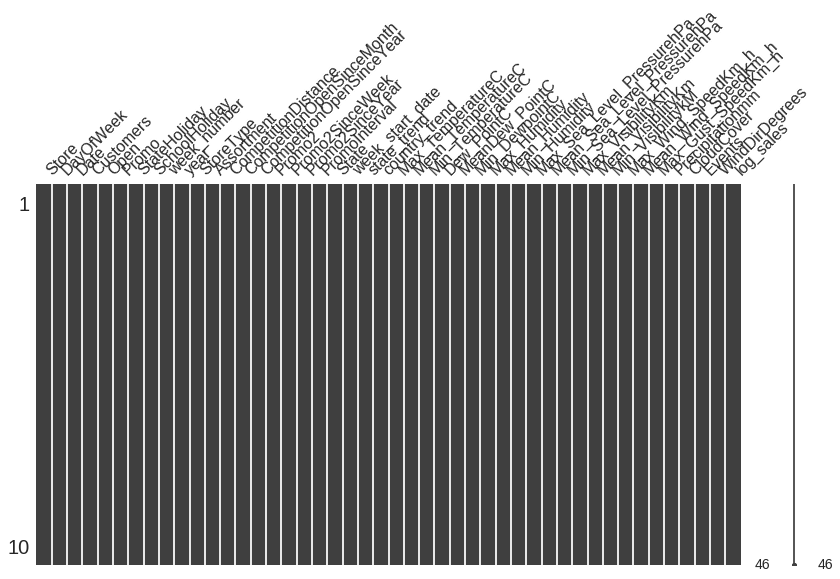

In [0]:
# Note to self: this helped me to catch HB,NI vs NI state coding mismatch between the datasets
msno.matrix(joined, figsize=(14,7))

## 4.1. Feature selection report

In [0]:
import pandas_profiling
pandas_profiling.ProfileReport(joined)

Number of variables,46
Number of observations,10
Total Missing (%),0.0%
Total size in memory,3.7 KiB
Average record size in memory,376.0 B
Numeric,19
Categorical,6
Boolean,5
Date,2
Text (Unique),0
Rejected,14


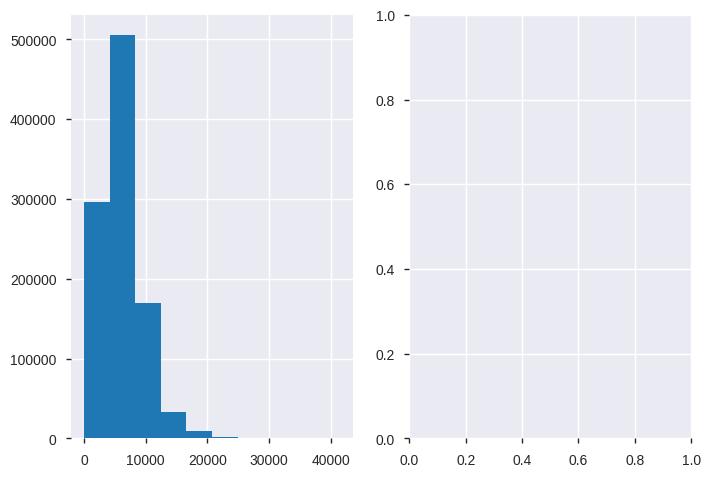

In [0]:
fig, ax = plt.subplots(ncols=2)
df_train['Sales'].hist(ax=ax[0])

## 4.2. Prepare train & test

In [0]:
# Note to self: this helped to spot bad field originating from refactoring. Also cool that NA distributions appear to be close between train/test
train_features = prepare(df_train)
print('--')
test_features = prepare(df_test)

Imputed 0.25973030124586% from NAs in CompetitionDistance
Imputed 31.787764363075826% from NAs in CompetitionOpenSinceMonth
Imputed 31.787764363075826% from NAs in CompetitionOpenSinceYear
Imputed 49.94362023930186% from NAs in Promo2SinceWeek
Imputed 49.94362023930186% from NAs in Promo2SinceYear
Imputed 49.94362023930186% from NAs in PromoInterval
Imputed 2.422805932704095% from NAs in Max_VisibilityKm
Imputed 2.422805932704095% from NAs in Mean_VisibilityKm
Imputed 2.422805932704095% from NAs in Min_VisibilitykM
Imputed 76.78284403696782% from NAs in Max_Gust_SpeedKm_h
Imputed 7.896017435944826% from NAs in CloudCover
Imputed 23.81496821203902% from NAs in Events
--
Imputed 0.026771806853582554% from NAs in Open
Imputed 0.2336448598130841% from NAs in CompetitionDistance
Imputed 37.032710280373834% from NAs in CompetitionOpenSinceMonth
Imputed 37.032710280373834% from NAs in CompetitionOpenSinceYear
Imputed 41.9392523364486% from NAs in Promo2SinceWeek
Imputed 41.9392523364486% from

In [0]:
len(df_train) / sum(df_train['Sales'] == 0)

5.884208456016336

In [0]:
set(train_features.columns) - set(test_features.columns)

{'Customers', 'log_sales'}

In [0]:
set(test_features.columns) - set(train_features.columns)

{'Id'}

In [0]:
# Note to self: although I dropped it initially, it's useful to have for submission generation and filtered out by enumerating columns to be used by the model
# test_features.drop('Id', axis=1, inplace=True)

In [0]:
train_features['Date'].min(),train_features['Date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [0]:
from fastai.tabular import *

In [0]:
len(train_features.columns)

46

In [0]:
# Note to self: this is easier and nicer than hand-splitting into sets of columns that fit the width
train_features.head().T

,0,1,2,3,4
Store,1,56,69,77,111
DayOfWeek,5,5,5,5,5
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Customers,555,619,1371,780,698
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,0,0,0,0,0
SchoolHoliday,1,1,1,1,1
week_number,31,31,31,31,31
year,2015,2015,2015,2015,2015


In [0]:
# Note to self: quicker to type than groupby + sum
train_features['Promo'].value_counts()

0    629129
1    388080
Name: Promo, dtype: int64

In [0]:
# TODO: convert dates to some sort of floats  [ 'Date', 'week_start_date', 'Customers']
# TODO: add more columns
# TODO: transform weather 'Events' into bunch of bool columns, e.g. is_rain
category_columns = ['Store', 'StoreType', 'Open', 'Assortment',
                    'StateHoliday', 'SchoolHoliday', 'Events', 'PromoInterval', 'Promo', 'Promo2', 'State',
                    'DayOfWeek', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'CloudCover']
continuous_columns = ['state_trend', 'country_trend', 'CompetitionDistance',
                      'Promo2SinceYear', 'Promo2SinceWeek',
                     'Min_TemperatureC',  'Min_Sea_Level_PressurehPa',  'Min_VisibilitykM',  'Min_Humidity', 'Min_DewpointC', 
                     'Mean_TemperatureC', 'Mean_Sea_Level_PressurehPa', 'Mean_VisibilityKm', 'Mean_Humidity','Mean_Wind_SpeedKm_h','MeanDew_PointC',
                     'Max_TemperatureC',  'Max_Sea_Level_PressurehPa',  'Max_VisibilityKm',  'Max_Humidity', 'Max_Wind_SpeedKm_h', 'Dew_PointC',
                     'Precipitationmm', 'WindDirDegrees', 'Max_Gust_SpeedKm_h']
target_columns = ['log_sales']

used_columns = list(category_columns + target_columns + continuous_columns)
ignored_columns = list(set(train_features.columns) - set(used_columns))

def update_column_types(df):
  for col in category_columns:
    if col in df.columns:
      df[col] = df[col].astype('category')

  for col in continuous_columns + target_columns:
    if col in df.columns:
      df[col] = df[col].astype('float32')

update_column_types(train_features)
update_column_types(test_features)

In [0]:
train_features['Promo2'].value_counts()

1    509178
0    508031
Name: Promo2, dtype: int64

In [0]:
ignored_columns

['week_number', 'year', 'Customers', 'Date', 'week_start_date']

In [0]:
train_features['Date'].min(), train_features['Date'].max(), train_features.iloc[valid_idx]['Date'].min()

(Timestamp('2013-01-01 00:00:00'),
 Timestamp('2015-07-31 00:00:00'),
 Timestamp('2015-05-02 00:00:00'))

In [0]:
def create_databunch(sample=False, verbose=False):
  # is there any way to both have the nicety of notebook introspection/logging
  # and ability to run/reuse cohesive chunks of code as in regular code?

  # this llog both makes the initial code more verbose and takes the output away so collating becomes harder :(
  def llog(a): (display(a()) if verbose else None)
  # Note to self: sample of 1/15 gave close approximation of the result
  # Full data, bs=512: 11.281156	10.898867	01:08
  # Sample,    bs=64:  11.454843	12.842732	00:12
  # Sample was also enough to see efficiency of adding 'StateHoliday', 'Open' into the columns
  # 0.674400	0.228686	00:12
  if (sample):
    sample = train_features[train_features['Date'] < pd.Timestamp('2013-03')]
    llog(lambda: (len(sample), len(train_features)))

    sample_valid_flag = sample['Date'] > pd.Timestamp('2013-02-20')
    sample_valid_idx = np.where(sample_valid_flag)
    llog(lambda: sum(sample_valid_flag))
  else:
    valid_flag = train_features['Date'] > pd.Timestamp('2015-05')
    valid_idx = np.where(valid_flag)
    llog(lambda: len(train_features)/valid_flag.sum())

    sample = train_features
    sample_valid_idx = valid_idx
    

  item_list = TabularList.from_df(sample, cat_names=category_columns, cont_names=continuous_columns)
  llog(lambda: type(item_list))

  split_list = item_list.split_by_idx(sample_valid_idx)
  llog(lambda: type(split_list))

  label_list = split_list.label_from_df(cols=target_columns)
  llog(lambda: type(label_list))

  # Note to self: a lot of people (incl me) pass ordinary dataframe here and struggle. Can be improved
  label_list = label_list.add_test(TabularList.from_df(test_features, cat_names=category_columns, cont_names=continuous_columns))
  llog(lambda: type(label_list))

  data = label_list.databunch(bs=64)
  def d(): x,y = next(iter(data.train_dl)); return len(x), x[0].shape, x[1].shape, y.shape
  llog(d)

  return data

data = create_databunch()

NameError: ignored

In [0]:
stest_features['Store'].dtype

CategoricalDtype(categories=[   1,    3,    7,    8,    9,   10,   11,   12,   13,   14,
                  ...
                  1104, 1105, 1106, 1107, 1109, 1111, 1112, 1113, 1114, 1115],
                 ordered=False)

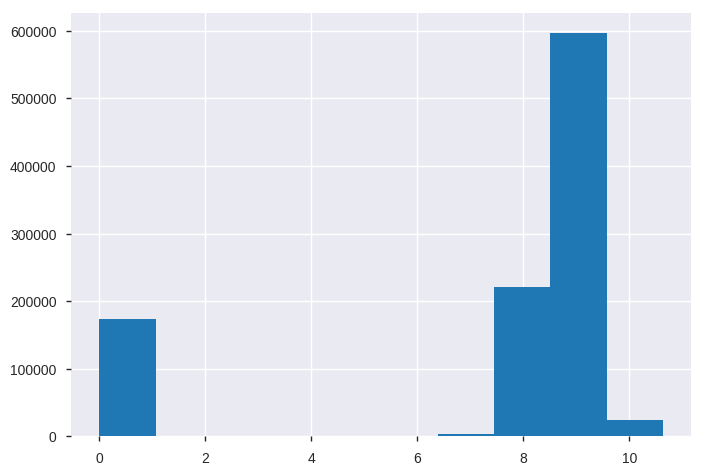

In [0]:
train_features['log_sales'].hist()

In [0]:
train_log_sales_min = train_features['log_sales'].min()
train_log_sales_max = train_features['log_sales'].max()
expected_log_sales_min = train_log_sales_min
# Note to self: be careful giving 20% buffer in the original non-logtransformed space vs log-transformed
# 5.69054 --> 0.59715 on LB which is still rank 3.1k out of 3.3k :)
expected_log_sales_max = train_log_sales_max + np.log(1.2) 
(expected_log_sales_min, expected_log_sales_max)
# Note to self: this really improved loss plot from Г-shape to a more typical one and training process went better

(0.0, 10.81702233194044)

In [0]:
learner = tabular_learner(data, layers=[1000, 100], y_range=[expected_log_sales_min, expected_log_sales_max], metrics=[exp_rmspe])

In [0]:
learner.lr_find(1e-12, 100)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


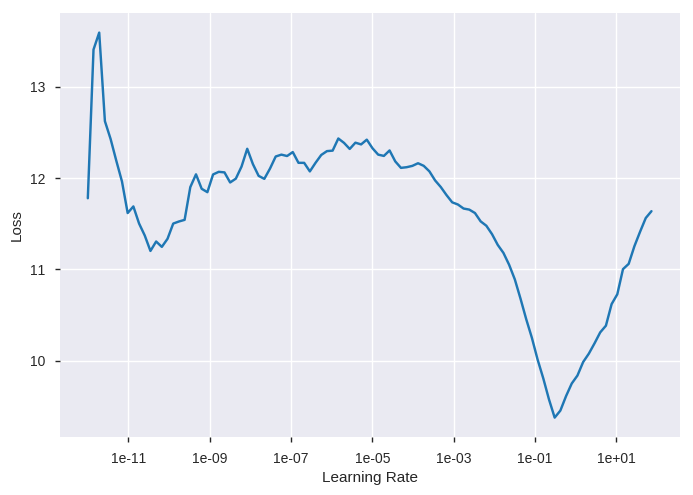

In [0]:
learner.recorder.plot(skip_end=0, skip_start=0)

In [0]:
from fastai.callbacks import SaveModelCallback
savemodel = SaveModelCallback(learner, name='v1')
learner.fit_one_cycle(3, max_lr=1e-1, callbacks=[savemodel])

epoch,train_loss,valid_loss,time
1,0.454066,0.161804,00:17
2,0.239350,0.149163,00:18
3,0.140647,0.081779,00:18


Better model found at epoch 1 with val_loss value: 0.16180387139320374.
Better model found at epoch 2 with val_loss value: 0.1491633802652359.
Better model found at epoch 3 with val_loss value: 0.08177920430898666.


In [0]:
learner.load('v1');
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


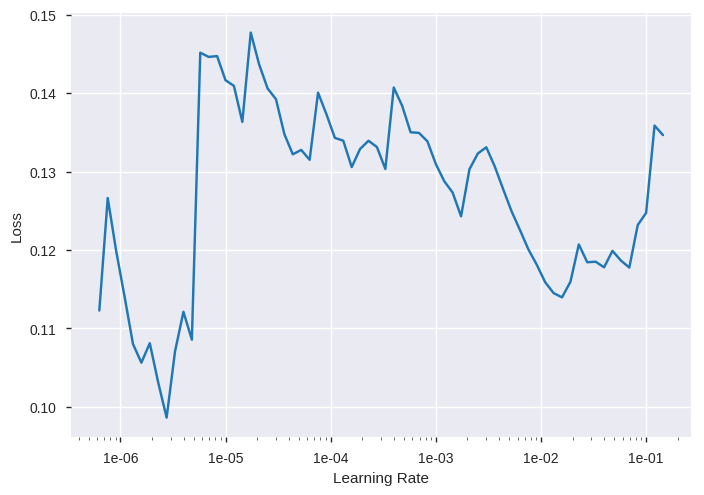

In [0]:
learner.recorder.plot()

In [0]:
savemodel = SaveModelCallback(learner, name='v2')
learner.load('v1');
learner.fit_one_cycle(3, max_lr=1e-6, callbacks=[savemodel])

epoch,train_loss,valid_loss,time
1,0.126945,0.057352,00:16
2,0.092876,0.029285,00:17
3,0.112315,0.037776,00:17


Better model found at epoch 1 with val_loss value: 0.05735209956765175.
Better model found at epoch 2 with val_loss value: 0.02928527630865574.


In [0]:
# TODO: 0.02 on sample is 7.80724 on LB, cross-validate all the things
# TODO: 0.09 on all the data is 5.69 on LB
learner.load('v2');
learner.validate()

[0.029285276]

In [0]:
learner.data = create_databunch(sample=False)

fastai.tabular.data.TabularList

fastai.data_block.ItemLists

fastai.data_block.LabelLists

fastai.data_block.LabelLists

(2, torch.Size([64, 15]), torch.Size([64, 25]), torch.Size([64]))

In [0]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


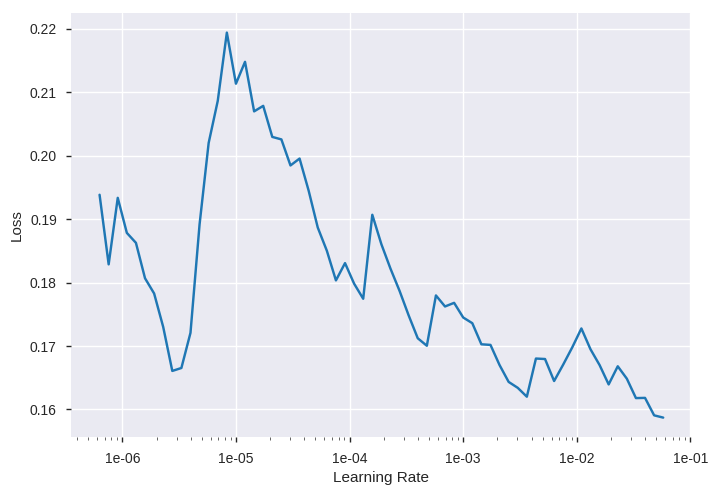

In [0]:
learner.recorder.plot()

In [0]:
learner.load('v2');
savemodel = SaveModelCallback(learner, name='v3')
learner.fit_one_cycle(5, max_lr=5e-5, callbacks=[savemodel])

epoch,train_loss,valid_loss,time
1,0.142937,0.115062,04:19
2,0.110372,0.090386,04:18
3,0.129565,0.232359,04:18
4,0.107259,0.121326,04:24
5,0.136683,0.201773,04:27


Better model found at epoch 1 with val_loss value: 0.1150624006986618.
Better model found at epoch 2 with val_loss value: 0.09038560837507248.


In [0]:
learner.load('v3')
learner.validate()

[1.5803535]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


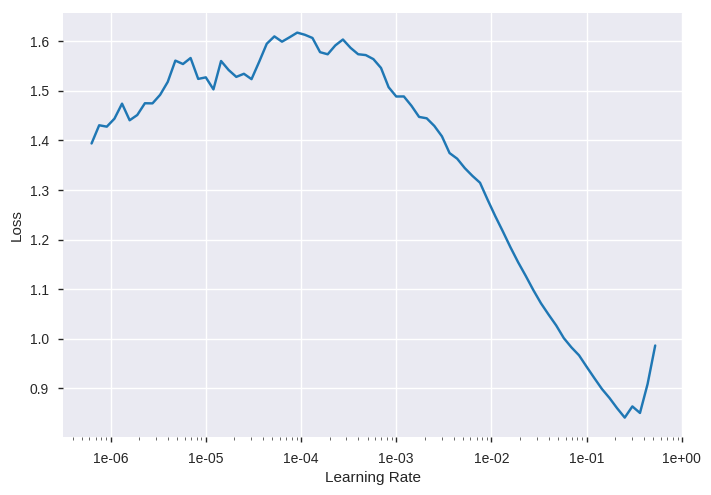

In [0]:
learner.lr_find()
learner.recorder.plot()

In [0]:
savemodel = SaveModelCallback(learner, name='v4')
learner.fit_one_cycle(3, max_lr=1e-3, callbacks=[savemodel])

epoch,train_loss,valid_loss,time
1,0.059546,0.049374,04:25
2,0.036635,0.035478,04:25
3,0.030253,0.083477,04:27


Better model found at epoch 1 with val_loss value: 0.049373917281627655.
Better model found at epoch 2 with val_loss value: 0.03547836095094681.


In [0]:
#%run / %load should be fun https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/
# TODO: https://github.com/yandex/rep

# Predict

In [0]:
# Note to self: forgetting / adding -1 doesn't seem to matter a lot: 5.69054 vs 5.69057
learner.load('v4')
test_df = test_features.copy()
test_preds=learner.get_preds(DatasetType.Test)
test_df["Sales"]=np.exp(test_preds[0].data).numpy().T[0]-1
test_df[["Id","Sales"]]=test_df[["Id","Sales"]].astype("int")
test_df[["Id","Sales"]].to_csv("rossmann_submission_v4.csv",index=False)

In [0]:
from google.colab import files
files.download('rossmann_submission_v4.csv')

In [0]:
sum(test_df['Sales'] == np.Inf)/len(test_df)

0.0

# Experiments


## tsfresh for feature extraction

In [0]:
# Note to self: tsfresh converts bunch of Series & target numbers into feature numbers describing Series

In [0]:
from fastai import *
from fastai.tabular import * 
import os

# generate some polynomial to test the functions out
x = np.arange(0, 1000)
y = x^2 + 1

# some fastai variables
path = os.getcwd()
df = pd.DataFrame({'x': x, 'y': y})
dep_var = 'y'
cat_names = []
procs = [Normalize]
valid_idx = range(1,1000)

# get the data bunch
data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs) # this line causes the error above